# Distribution statistics

We are going to look at `Particle` class for this notebook to generate particle distributions.

So let's get those imported along with numpy and `matplotlib` for plotting.

In [2]:
try:
    import particula, matplotlib
except ImportError:
    print("Setting up computational environment...")
    %pip install -U particula -qqq
    %pip install matplotlib -qqq


from particula import particle, rates
import numpy as np
from matplotlib import pyplot as plt

## `Particle`

Let's just call this and see what we get.

In [3]:
default_distribution = particle.Particle()

print("Radii: ")
print(default_distribution.particle_radius[:10])

Radii


Magnitude,[4.1972292396604054e-08 4.216876899517281e-08 4.236524559374157e-08 4.256172219231033e-08 4.275819879087909e-08 4.295467538944785e-08 4.315115198801661e-08 4.3347628586585377e-08 4.3544105185154136e-08 4.3740581783722896e-08]
Units,meter


At every radius listed in `.particle_radius` is a probability of the particles at that radius. Thus, we have probability distribution function (PDF) of particles.

In [4]:
print("Particles PDF given radii: ")
print(default_distribution.particle_distribution()[:10])

Particles PFD given radii.


Magnitude,[2200235960693703.8 2375247794883328.5 2562153632216260.0 2761608050637125.5 2974291484346663.0 3200910665710347.5 3442199044624819.5 3698917183754246.5 3971853128059254.0 4261822747056273.0]
Units,1/meter4


## Plot the particle PDF
Let's see what this particle PDF looks like now.

(Note using `.m` returns just the magnitude and drops the units.)

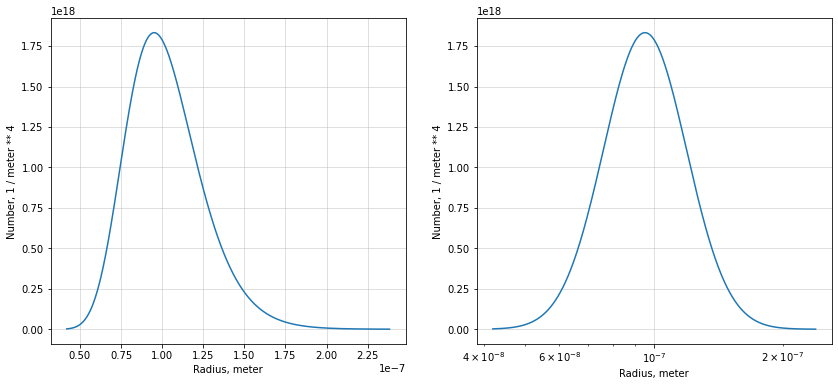

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[14, 6])

#linear scale
ax[0].plot(default_distribution.particle_radius.m, default_distribution.particle_distribution().m)

ax[0].set_ylabel(f"Number, {default_distribution.particle_distribution().u}")
ax[0].set_xlabel(f"Radius, {default_distribution.particle_radius.u}")
ax[0].grid(True, alpha=0.5)

#log x
ax[1].semilogx(default_distribution.particle_radius.m, default_distribution.particle_distribution().m)

ax[1].set_ylabel(f"Number, {default_distribution.particle_distribution().u}")
ax[1].set_xlabel(f"Radius, {default_distribution.particle_radius.u}")
ax[1].grid(True, alpha=0.5)


## Summary statistics of a particle PDF
As the keen-eyed reader may have noticed, this is not a typical PDF and the maximunm is very large ($1.75*10^{18}$). Lets define some diagnostic functions and see what we get for the integral area.

In [6]:
def pdf_total(radius, pdf_distribution):
    return np.trapz(y=pdf_distribution, x=radius)

def pdf_volume_total(radius, pdf_distribution):
    return np.trapz(y=pdf_distribution* 4/3 * np.pi * radius**3, x=radius)

print(f'Total number of the PDF, {pdf_total(default_distribution.particle_radius, default_distribution.particle_distribution())}')

print(f'Total volume of the PDF, {pdf_volume_total(default_distribution.particle_radius, default_distribution.particle_distribution())}')

Total number of the PDF, 99989997132.11078 / meter ** 3
Total volume of the PDF, 5.237475060187453e-10 dimensionless




*   The integral area of the particle PDF is the total number of the distribution, $0.99\times 10^{12}$ m $^{-3}$.
*   Converting to volume PDF, the integral is the total volume of the particle distribution, $5\times 10^{-10}$.





That was using defaults, but the defaults might not work for your case so you can change the distribution properties using keyword arguments. 

Note the line spacing is how the bin widths are spaced, for numerical efficiently in the coagulation calculation `linspace` is preferred over `logspace`.

For a complete list of the `kwargs` you can look at the XXX document. 

In [7]:
# around here, just define a kwargs

fine_mode = {
    "mode": 150e-9, # 200 nm median
    "nbins": 1000, # 1000 bins
    "nparticles": 1e8, # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": 1.25, # relatively narrow
    "spacing": "linspace", # bin spacing, 
}

coarse_mode = {
    "mode": 2000e-9, # 200 nm median
    "nbins": 1000, # 1000 bins
    "nparticles": 1e5, # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": 1.4, # relatively narrow
    "spacing": "linspace", # bin spacing, 
}

multi_mode = {
    "mode": [5000e-9, 50e-9, 300e-9], # 200 nm median
    "nbins": 1000, # 1000 bins
    "nparticles": [1e6,1e9,1e7], # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": [1.5,1.2,1.5], # relatively narrow
    "spacing": "logspace", # bin spacing, 
}


In [8]:
fine_mode_dist = particle.Particle(**fine_mode) # pass the kwargs using ** prefix
coarse_mode_dist = particle.Particle(**coarse_mode) 
multi_mode = particle.Particle(**multi_mode) 

In [9]:
print(f'Total number of the PDF, {pdf_total(fine_mode_dist.particle_radius, fine_mode_dist.particle_distribution())}')

print(f'Total volume of the PDF, {pdf_volume_total(fine_mode_dist.particle_radius, fine_mode_dist.particle_distribution())}')
print(f'Total volume of the PDF, {pdf_volume_total(coarse_mode_dist.particle_radius, coarse_mode_dist.particle_distribution())}')
print(f'Total volume of the PDF, {pdf_volume_total(multi_mode.particle_radius, multi_mode.particle_distribution())}')

Total number of the PDF, 99989997132110.78 / meter ** 3
Total volume of the PDF, 1.7676478328132657e-06 dimensionless
Total volume of the PDF, 5.566386043732607e-06 dimensionless
Total volume of the PDF, 0.0003653651719983997 dimensionless


Let's see what we just made.

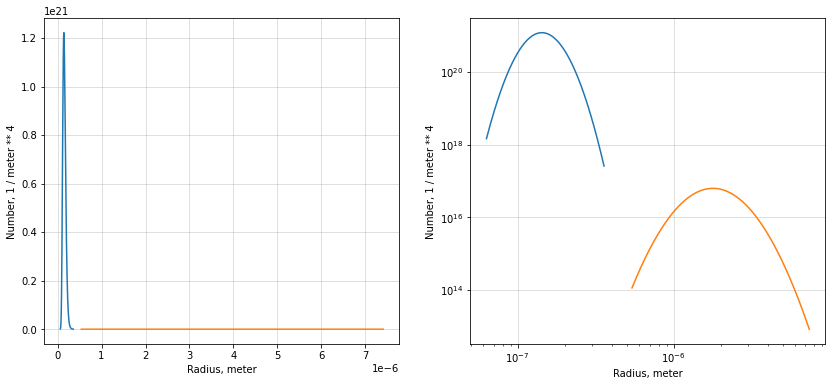

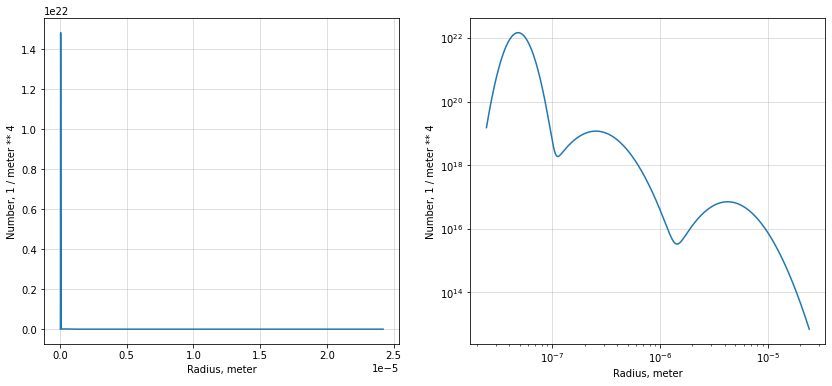

In [10]:
fig, ax = plt.subplots(1, 2, figsize=[14, 6])

ax[0].plot(fine_mode_dist.particle_radius.m, fine_mode_dist.particle_distribution().m)
ax[0].plot(coarse_mode_dist.particle_radius.m, coarse_mode_dist.particle_distribution().m)

ax[0].set_ylabel(f"Number, {fine_mode_dist.particle_distribution().u}")
ax[0].set_xlabel(f"Radius, {fine_mode_dist.particle_radius.u}")
ax[0].grid(True, alpha=0.5)

ax[1].loglog(fine_mode_dist.particle_radius.m, fine_mode_dist.particle_distribution().m)
ax[1].loglog(coarse_mode_dist.particle_radius.m, coarse_mode_dist.particle_distribution().m)

ax[1].set_ylabel(f"Number, {coarse_mode_dist.particle_distribution().u}")
ax[1].set_xlabel(f"Radius, {coarse_mode_dist.particle_radius.u}")
ax[1].grid(True, alpha=0.5)


fig, ax= plt.subplots(1, 2, figsize=[14, 6])

ax[0].plot(multi_mode.particle_radius.m, multi_mode.particle_distribution().m)

ax[0].set_ylabel(f"Number, {multi_mode.particle_distribution().u}")
ax[0].set_xlabel(f"Radius, {multi_mode.particle_radius.u}")
ax[0].grid(True, alpha=0.5)

ax[1].loglog(multi_mode.particle_radius.m, multi_mode.particle_distribution().m)

ax[1].set_ylabel(f"Number, {multi_mode.particle_distribution().u}")
ax[1].set_xlabel(f"Radius, {multi_mode.particle_radius.u}")
ax[1].grid(True, alpha=0.5)